# Runs the Heat Pump Model for Multiple Scenaries across Multiple Communities

In [1]:
import numpy as np
import pandas as pd

#---- Auto-reload of modules
%load_ext autoreload
%autoreload 2

#---- Altair imports 
import altair as alt
alt.data_transformers.enable('json')   # keeps Huge data out of Notebook

DataTransformerRegistry.enable('json')

## Test out Plotting

In [49]:
df_test = pd.DataFrame({'Val': [-3500, -2000, -840, 1230., 2420., 4560., 5230],
                        'Scenario': ['a', 'b', 'c', 'd', 'e', 'f', 'g']})
df_test['City'] = 'Kotzebue'
df_test['Econ'] = 'Close'
df_test.loc[df_test.Val < -2000, 'Econ'] =  'Not Economic'
df_test.loc[df_test.Val > 0, 'Econ'] =  'Economic'
df_test2 = df_test.copy()
df_test2['Val'] -= 300
df_test2['City'] = 'Ambler'
df_test = pd.concat([df_test, df_test2])

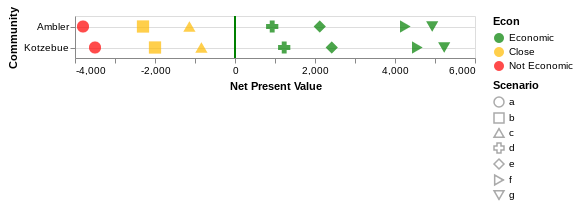

In [55]:
# make a color scale for economic payback
color_scale = alt.Scale(
            domain=['Economic', 'Close', 'Not Economic'],
            range=['green', '#FFBB00', 'red'])

main = alt.Chart(df_test).mark_point(size=150).encode(
    x=alt.X('Val', axis=alt.Axis(title='Net Present Value', grid=False)),
    y=alt.Y('City', axis=alt.Axis(title='Community', grid=True)),
    shape='Scenario',
    color=alt.Color('Econ', scale=color_scale),
    fill=alt.Color('Econ', scale=color_scale),
    tooltip=['Scenario']
)
rule_data = pd.DataFrame([{"ThresholdValue": 0, "Threshold": "breakeven"}])
rule = alt.Chart(rule_data).mark_rule(color='green').encode(
    x='ThresholdValue',
    size=alt.value(2)
)
(rule + main).interactive()